In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [130]:
#import Data
data = pd.read_csv('C:/Users/anastasia.golubova/PycharmProjects/HOMEWORKS/data.csv')
data = data.drop(columns='id')

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [132]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [133]:
data = data.dropna(axis=1)

In [134]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


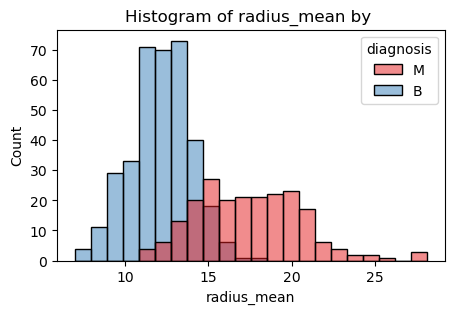

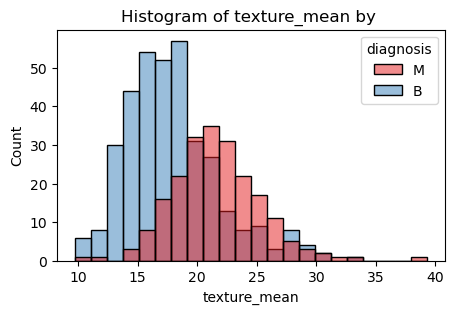

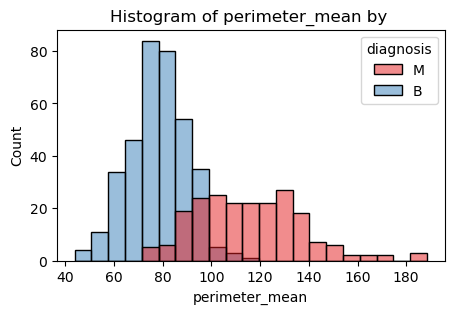

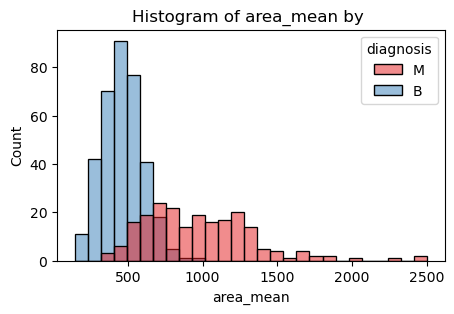

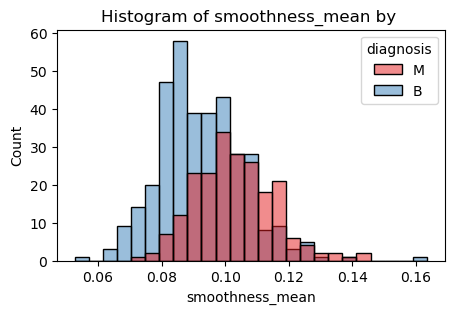

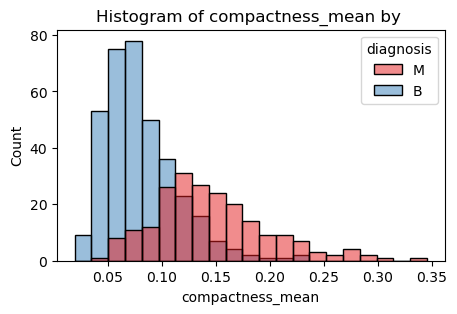

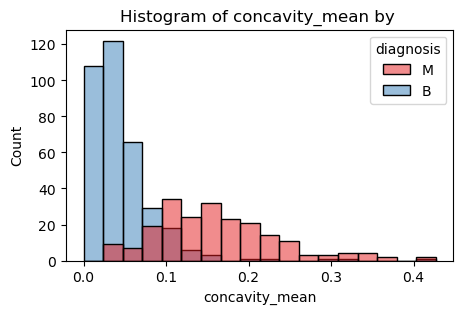

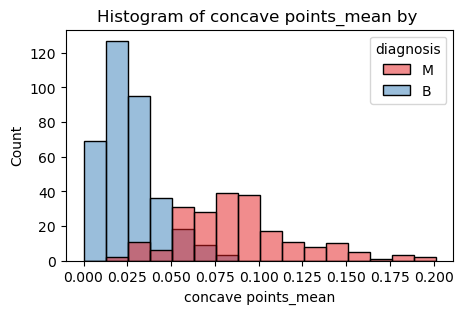

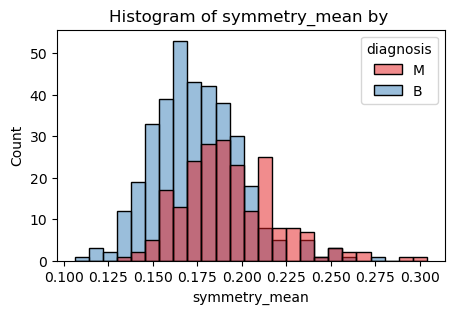

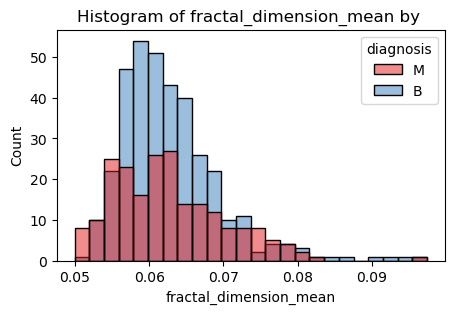

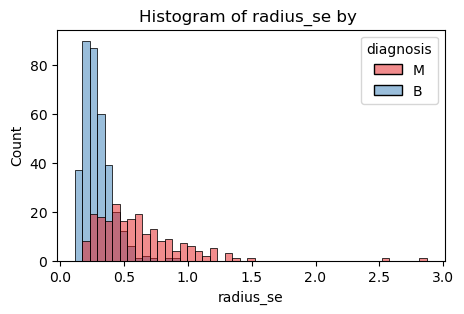

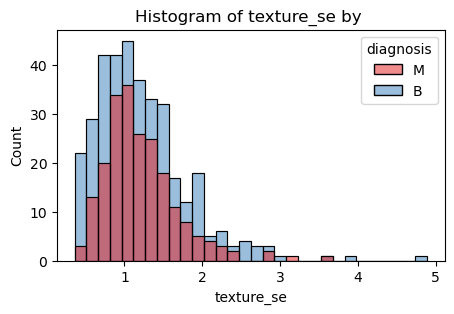

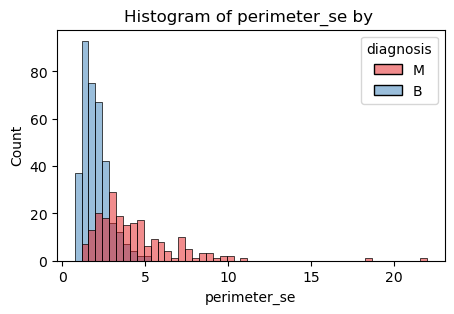

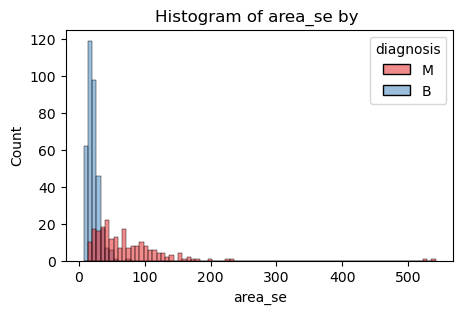

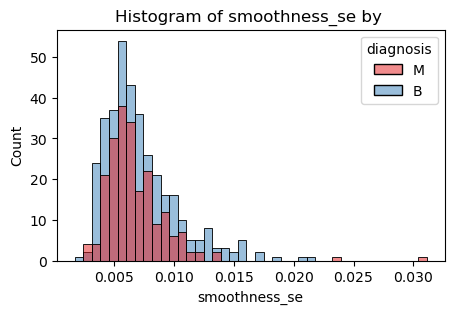

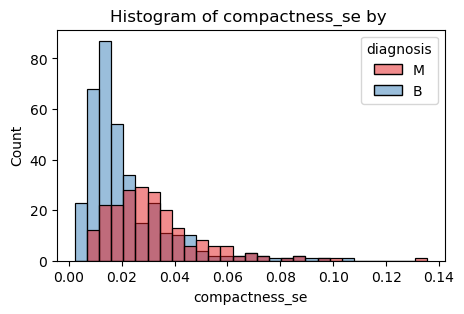

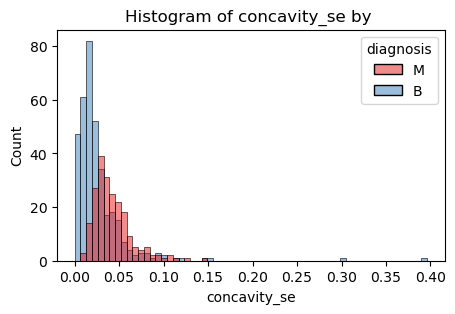

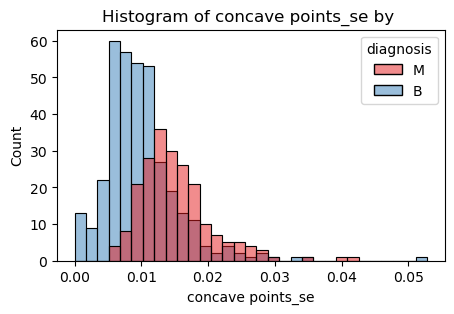

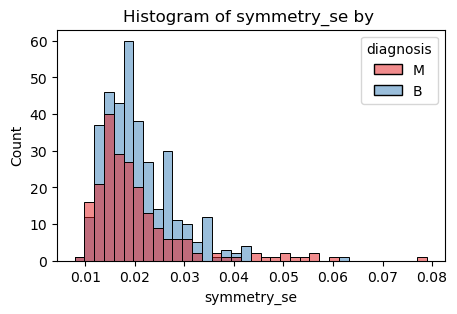

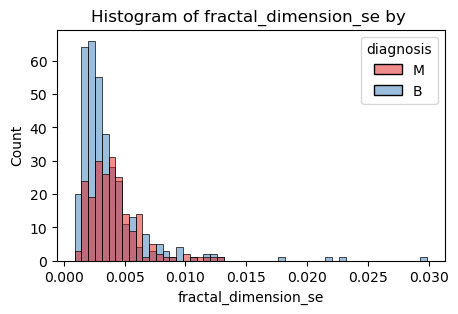

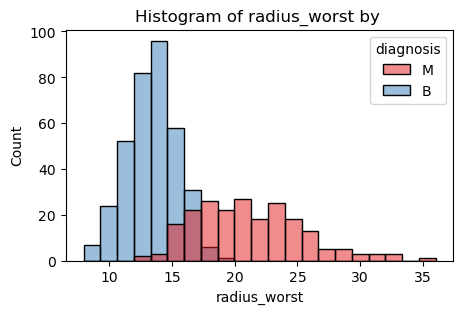

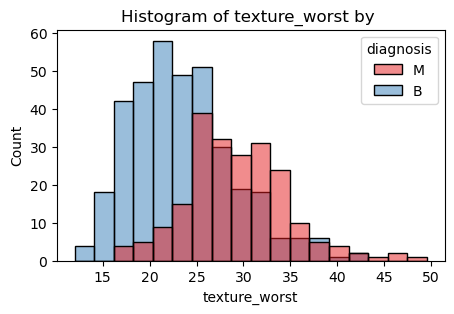

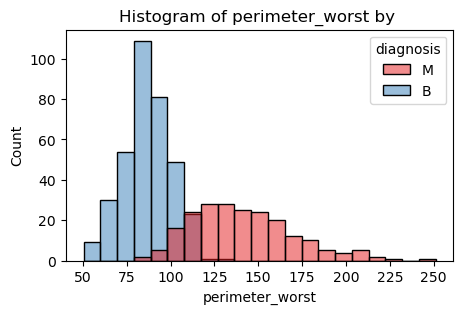

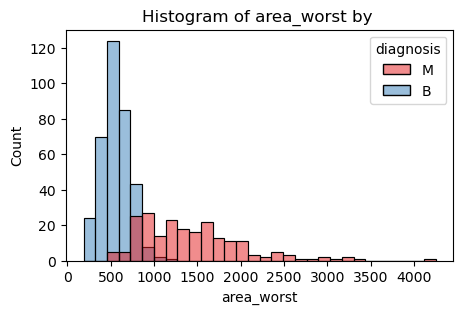

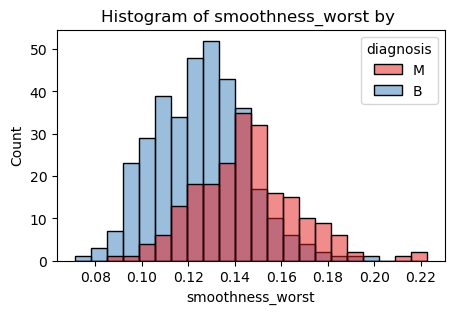

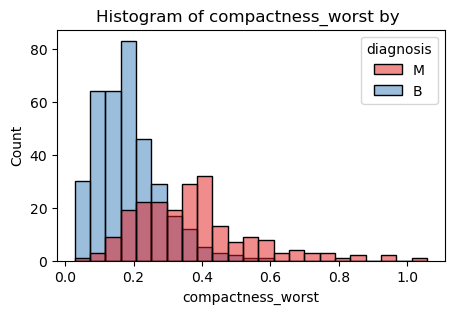

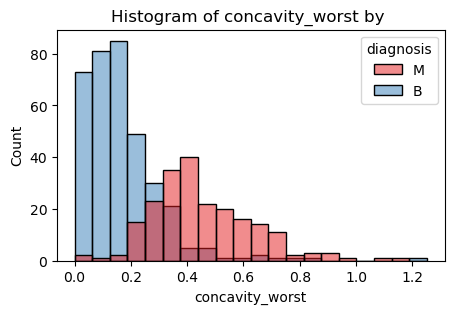

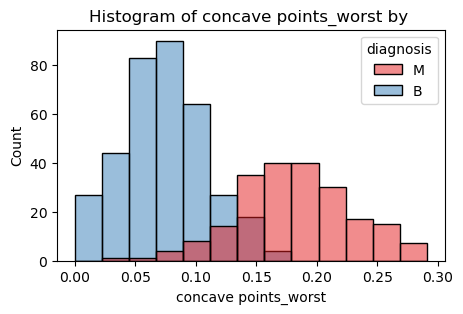

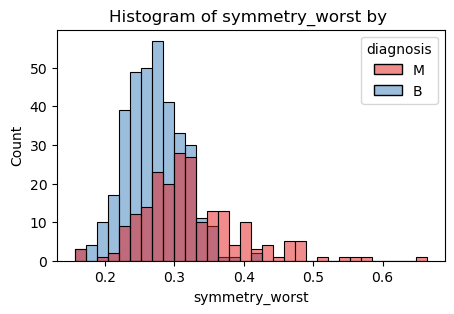

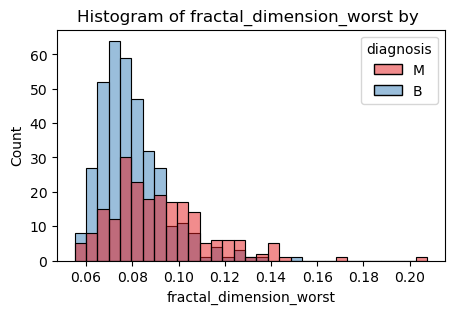

In [135]:
for col in data.drop(columns=['diagnosis']).columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=col, hue='diagnosis', palette="Set1")
    plt.title(f"Histogram of {col} by ")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

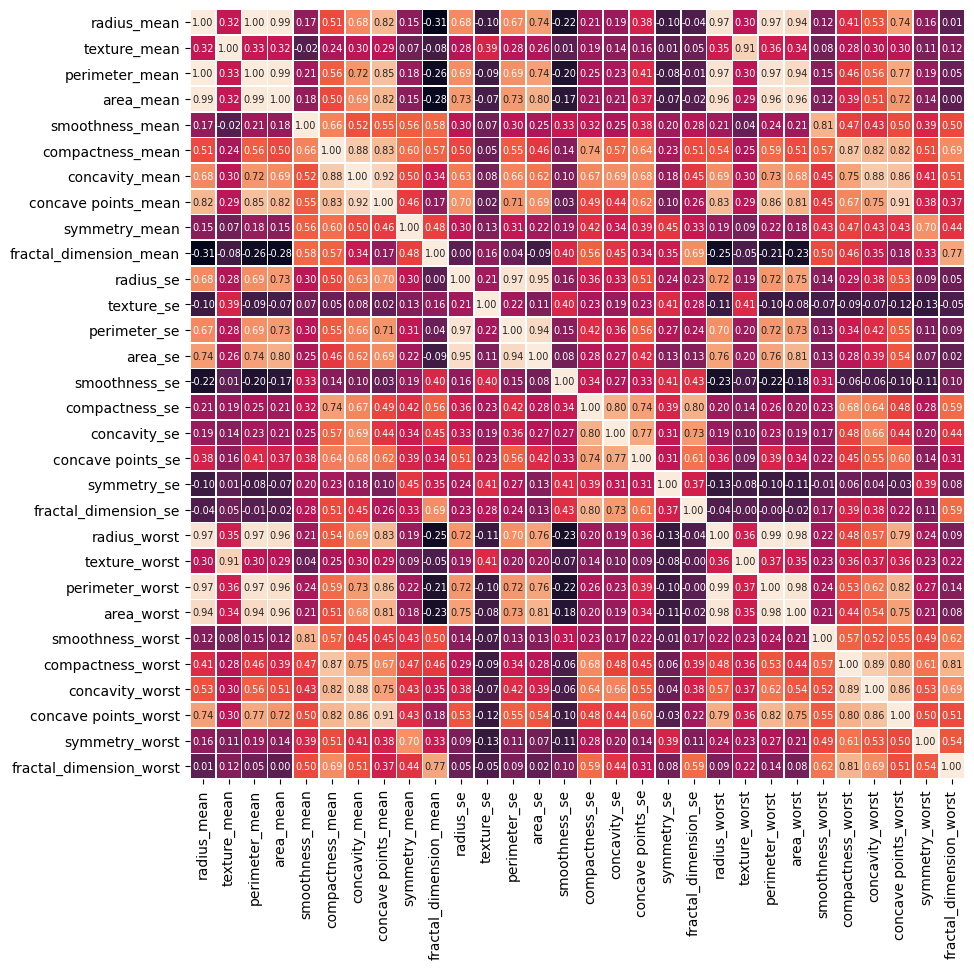

In [136]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.drop(['diagnosis'], axis=1).corr(), annot=True,annot_kws={"size": 7}, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Наиболее сильно скоррелированы между собой геометрические характеристики, такие как radius_mean, radius_worst,radius_se,
perimeter_mean, perimeter_worst, perimeter_se, area_mean, area_se, area_worst, concave_points_mean, concavity_mean

In [137]:
#check highly correlated features
df = data.drop(columns='diagnosis').corr()
high_corr_pairs = df.where((df.abs() > 0.95) & (df.abs() < 1))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs

,level_0,level_1,0
0,radius_mean,perimeter_mean,0.997855
1,radius_mean,area_mean,0.987357
2,radius_mean,radius_worst,0.969539
3,radius_mean,perimeter_worst,0.965137
4,perimeter_mean,radius_mean,0.997855
5,perimeter_mean,area_mean,0.986507
6,perimeter_mean,radius_worst,0.969476
7,perimeter_mean,perimeter_worst,0.970387
8,area_mean,radius_mean,0.987357
9,area_mean,perimeter_mean,0.986507


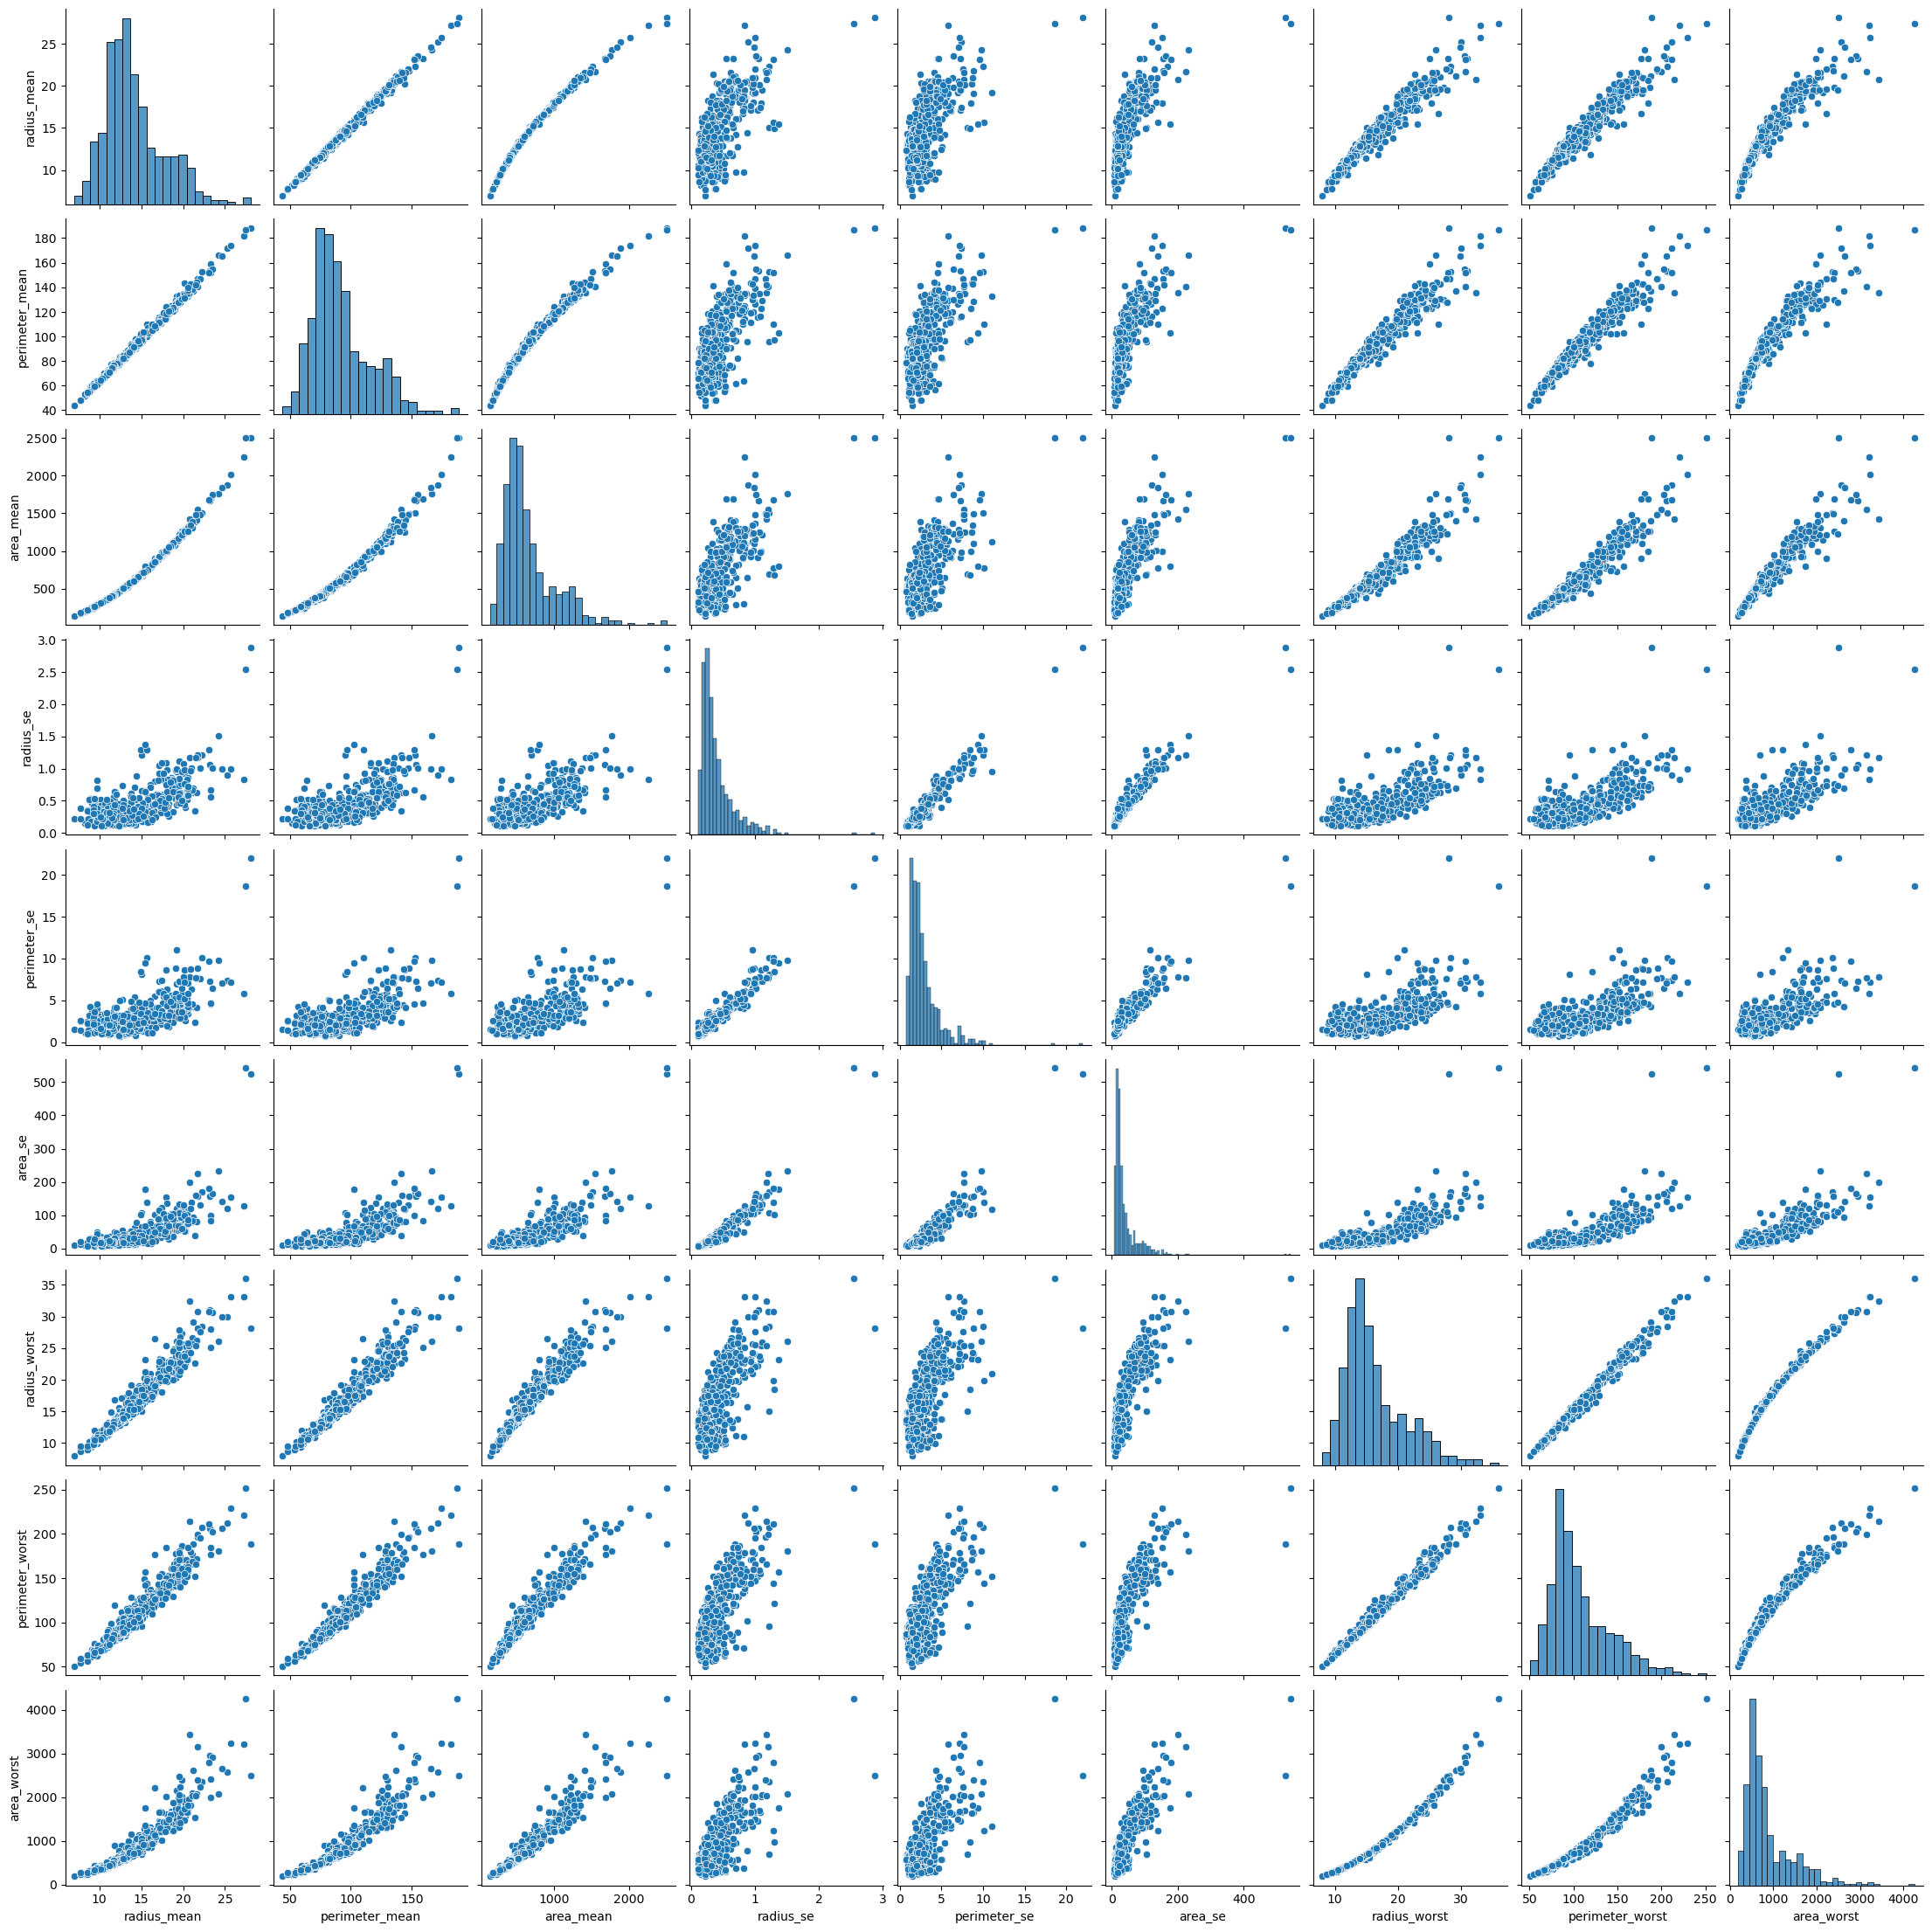

In [36]:
corr = data[high_corr_pairs['level_0'].unique()]
sns.pairplot(corr)

Линейная зависимость лжидаемо наблюдается между периметрами и радиусами, и квадритичная между признаками периметр-площадь и 
радиус-площадь. Из данных признаков для упрощения можно оставить только area_mean для дальнейшего анализа

In [138]:
features_drop = ['radius_mean','radius_worst','radius_se','perimeter_mean','perimeter_se','perimeter_worst','area_se','area_worst']
data = data.drop(columns=features_drop)

In [139]:
data

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,0.006193,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,0.003532,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,0.004571,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,0.009208,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,0.005115,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,...,0.02454,0.01114,0.004239,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,...,0.01678,0.01898,0.002498,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,...,0.01557,0.01318,0.003892,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,...,0.01664,0.02324,0.006185,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


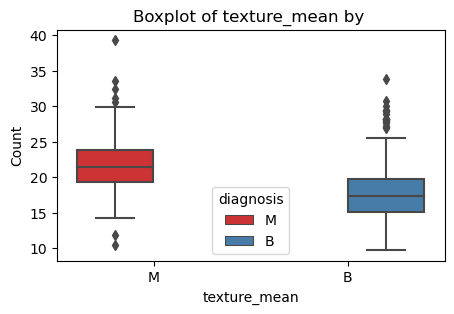

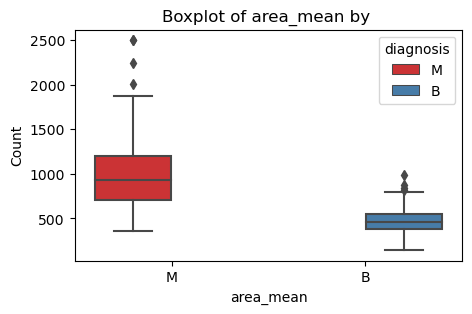

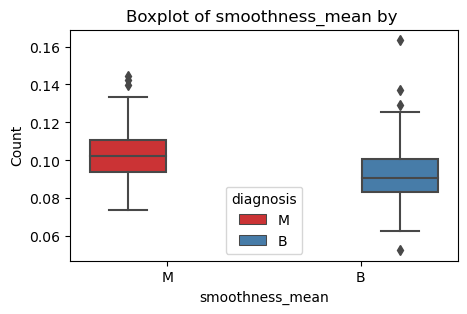

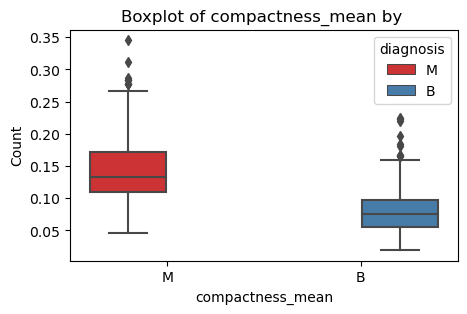

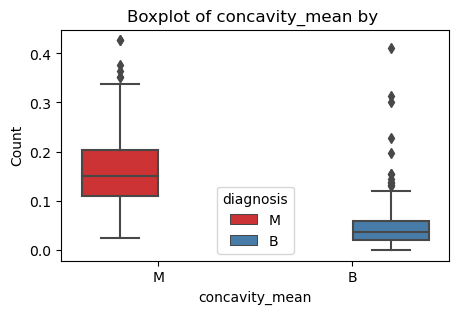

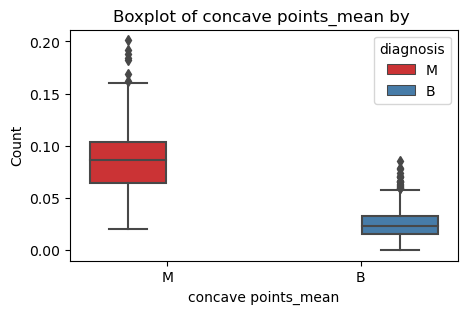

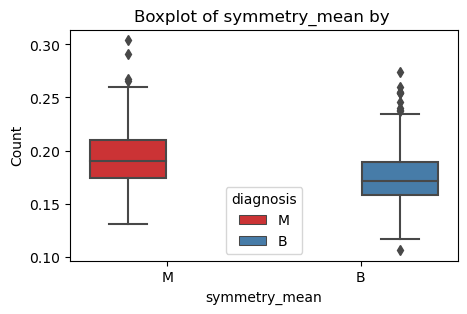

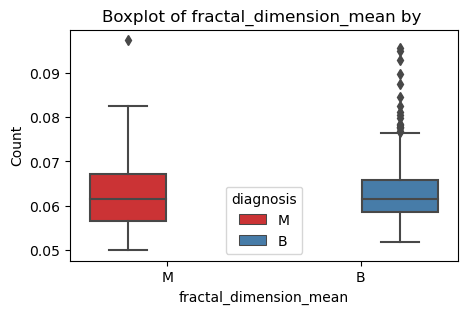

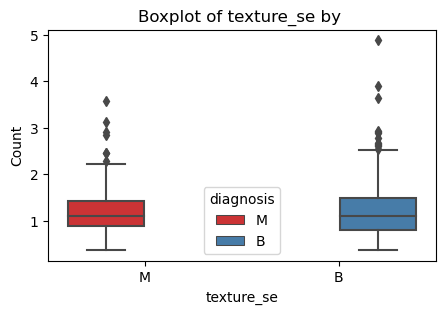

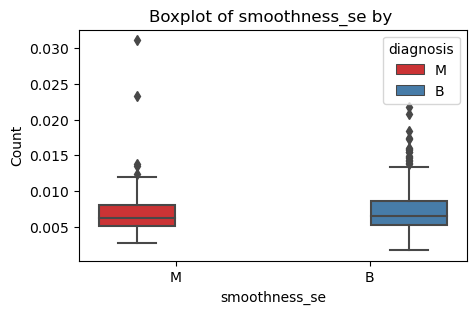

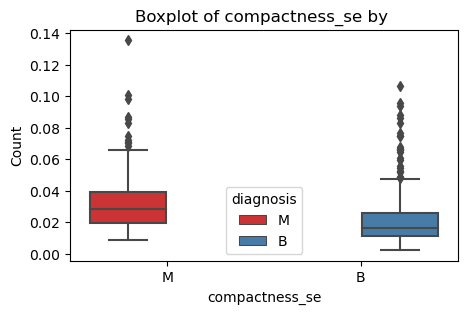

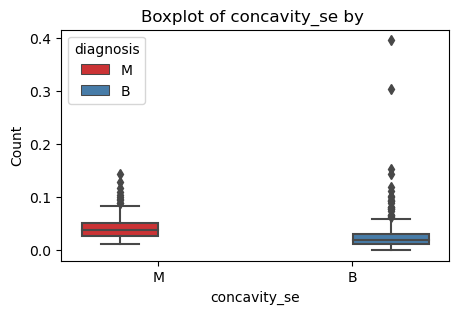

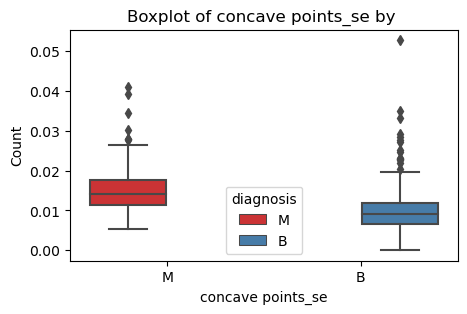

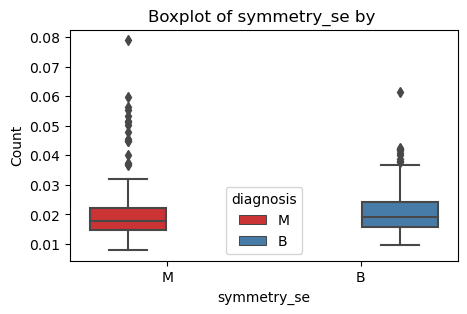

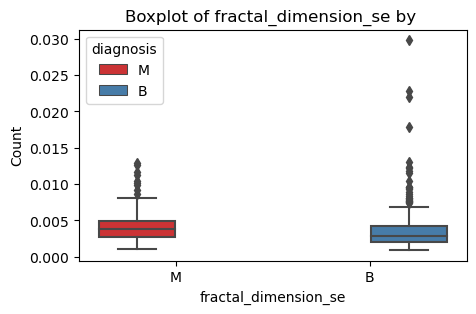

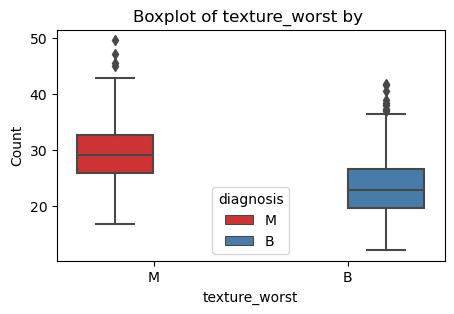

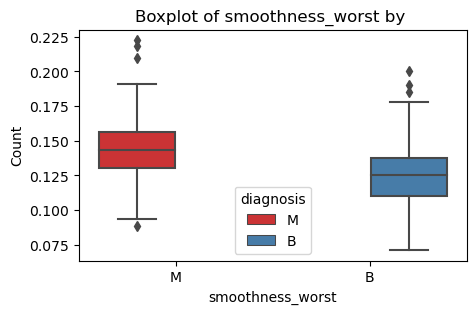

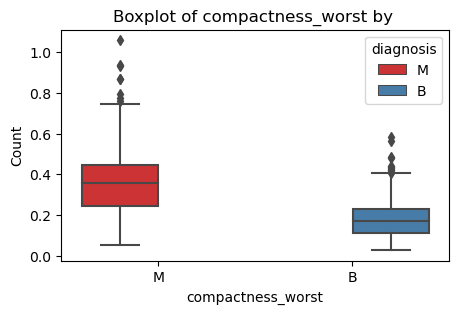

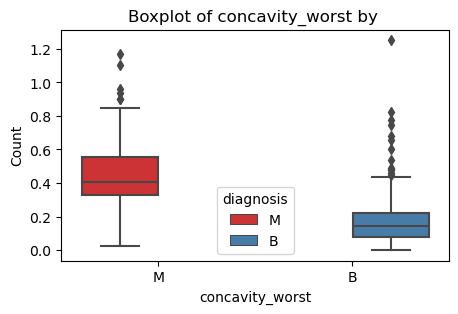

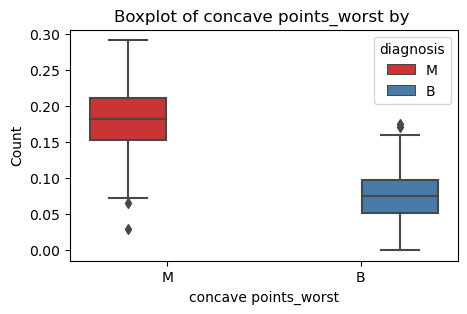

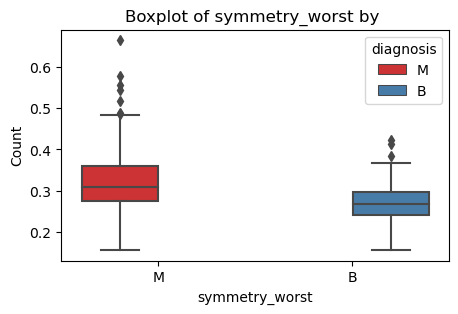

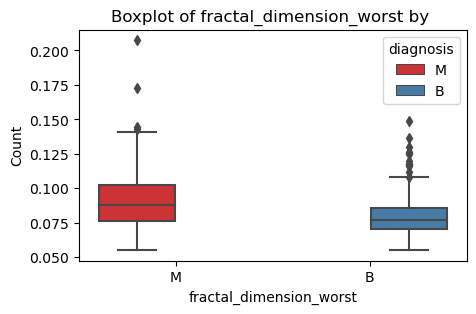

In [140]:
for col in data.drop(columns=['diagnosis']).columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=data,x='diagnosis',y=col, hue='diagnosis', palette="Set1")
    plt.title(f"Boxplot of {col} by ")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

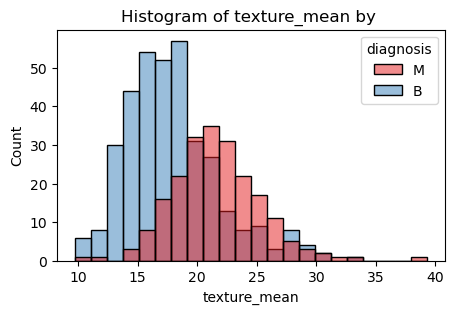

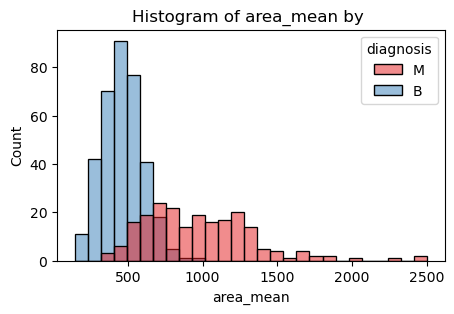

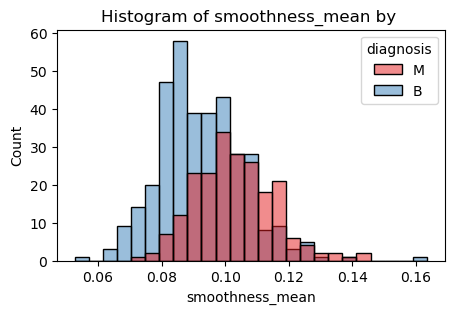

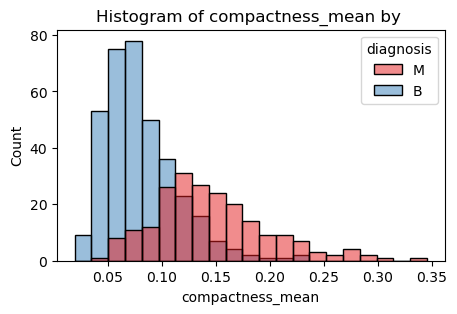

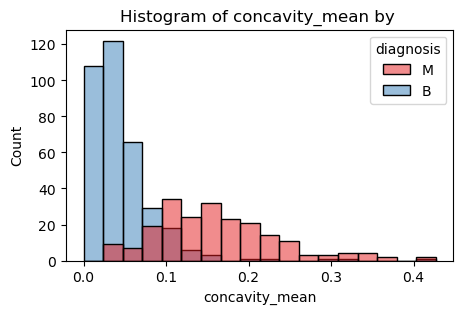

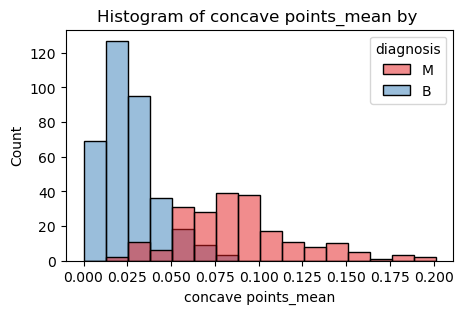

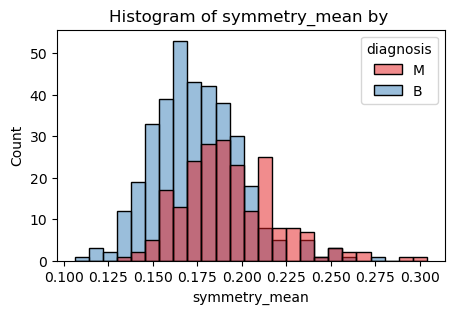

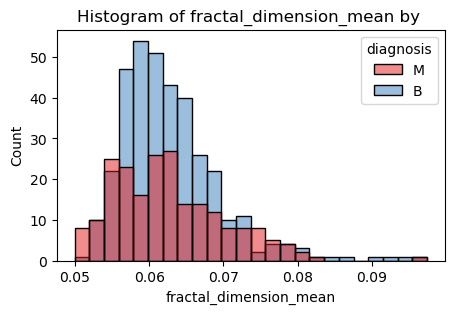

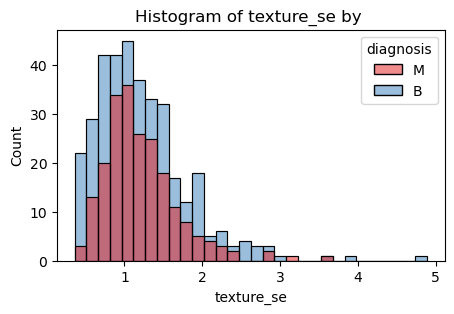

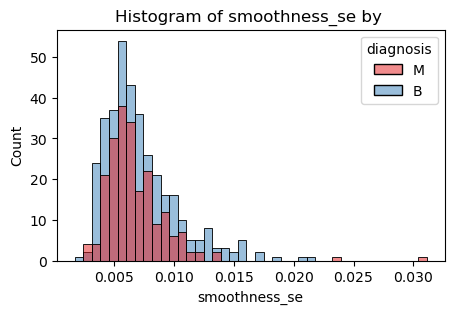

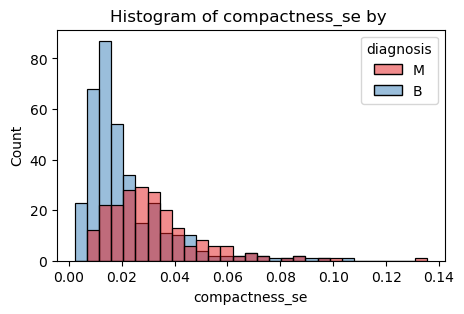

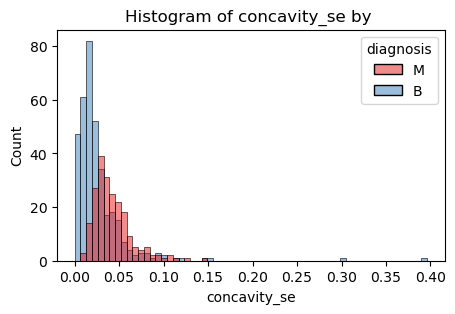

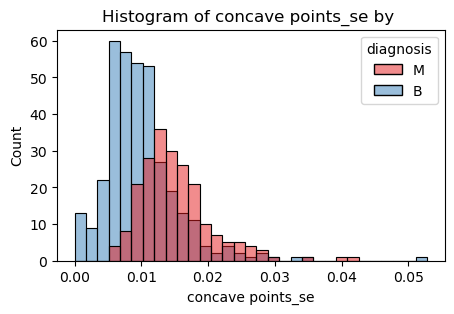

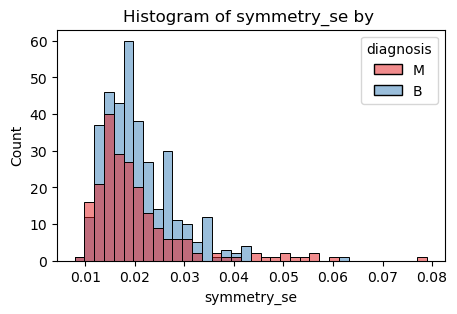

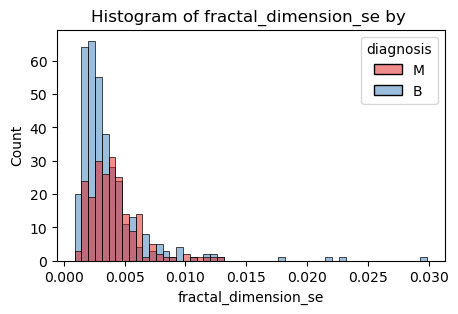

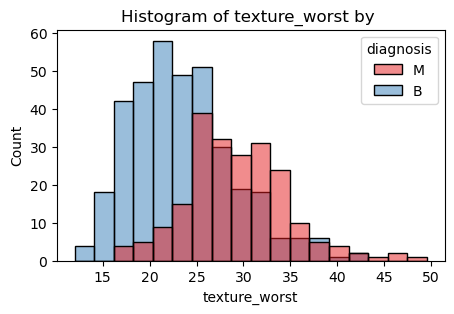

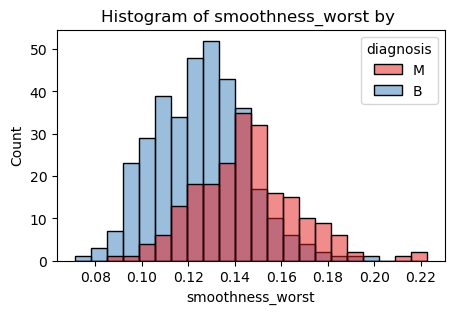

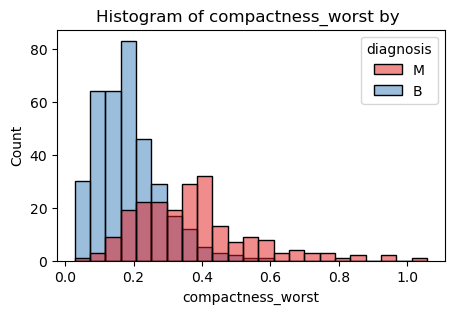

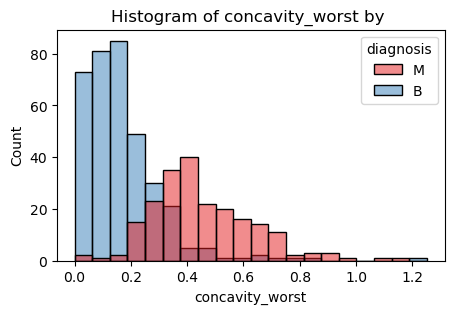

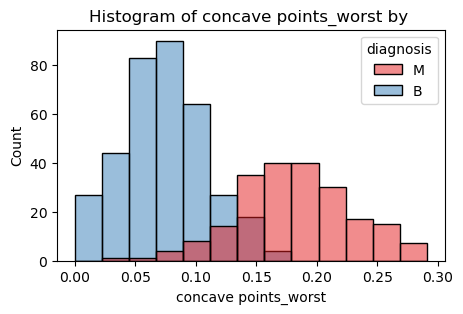

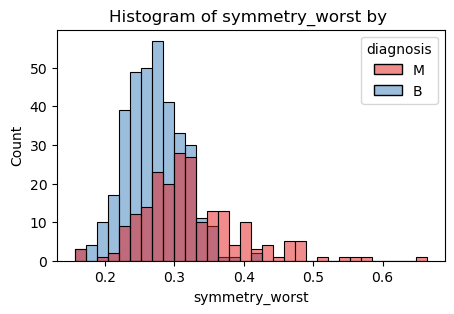

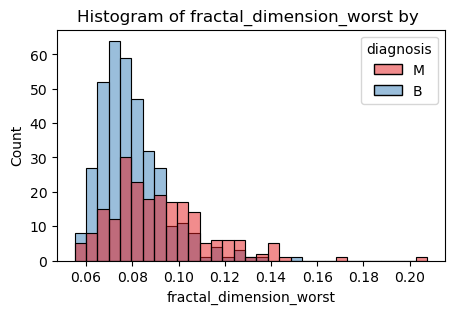

In [141]:
for col in data.drop(columns=['diagnosis']).columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=data, x=col, hue='diagnosis', palette="Set1")
    plt.title(f"Histogram of {col} by ")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Согласно построенным боксплотам и гистограммам визуально наибольшее разделение между заболеваниями дают признаки texture_mean, area_mean, compactness_mean, concavity_mean, concave_points_mean, compactness_se, concavity_se, concave_points_se, texture_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst

In [142]:
columns = ['texture_mean','area_mean','compactness_mean','concavity_mean','concave points_mean','compactness_se','concavity_se',
           'concave points_se','texture_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst']
X = data[columns]
y = data['diagnosis']

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

kNN,ROC curve (area = 0.99)


Text(0, 0.5, 'tpr')

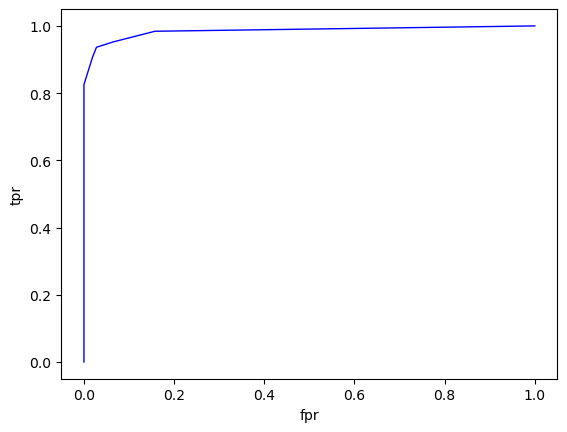

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

#стандартизация нужна, потому что числовой разброс признаков очень обширный
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())  
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = pd.Series(y_pred).map({'B': 0, 'M': 1})
y_test = y_test.map({'B': 0, 'M': 1})
y_prob = pipeline.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred)
print(report)

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
print(f'kNN,ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr, tpr, color='blue', lw=1)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [148]:
#parameter tuning
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())  
])

param_grid = {'clf__n_neighbors':[5,10,20,50],'clf__metric': ['euclidean', 'manhattan', 'minkowski']}
grid_knn = GridSearchCV(pipeline,param_grid,cv=5)
grid_knn.fit(X_train, y_train)

best_model_knn = grid_knn.best_estimator_

best_model_knn.fit(X_train,y_train)
print(f'Best n_neighbors: {grid_knn.best_params_["clf__n_neighbors"]}')
print(f'Best metric: {grid_knn.best_params_["clf__metric"]}')

Best n_neighbors: 10
Best metric: manhattan



Test Accuracy:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

kNN,ROC curve (area = 0.99)


Text(0, 0.5, 'tpr')

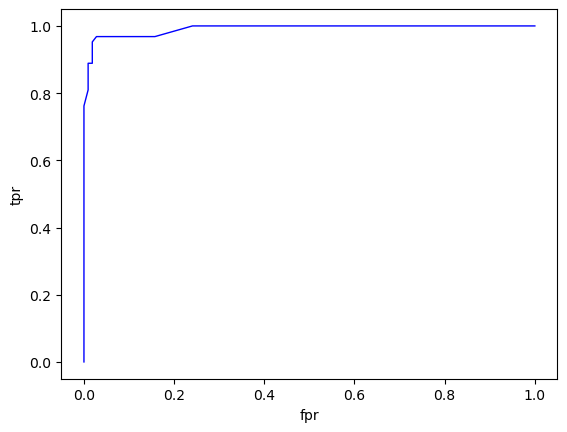

In [149]:
y_test = y_test.map({'B': 0, 'M': 1})
y_pred = best_model_knn.predict(X_test)
y_pred = pd.Series(y_pred).map({'B': 0, 'M': 1})
print('\nTest Accuracy:\n', classification_report(y_test, y_pred))

y_prob = best_model_knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
print(f'kNN,ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr, tpr, color='blue', lw=1)
plt.xlabel('fpr')
plt.ylabel('tpr')

Настройка парметров с помощью кросс-валидации не помогла улучшить модель, однако модель даже с базовыми настройками давала точность 0.99